# chapter. 1 간단복습

1. 학습의 종류
    - 지도학습: (X, y)가 있다. 회귀/분류가 여기에 속한다.
    - 비지도학습: y가 없다. 군집/차원축소가 여기에 속한다.
    - 강화학습: 행동과 보상으로 학습한다.

2. 문제 유횽
    - 회귀: y가 연속값(집값, 온도).
    - 분류: y가 범주(스팸/정상, 질병 유무).
    - 군집: 정답 없이 비슷한 것끼리 묶는다.

3. 용어 복습
    - feature(X): 입력 변수들(열들).
    - label(y), target variable: 정답.
    - estimator: 모델 클래스(예: DecisionTreeClassifier)
    - transformer: 전처리 변환기(예: StandardScaler)
    - pipeline: 전처리+모델을 한 덩어리로 묶는 흐름
    - metric: 성능을 숫자로 평가하는 기준(예: accuracy)

4. 머신러닝 전체 흐름
    1. 데이터 수집
    2. 데이터 전처리(traning/test 분리)
    3. 모델 선택 및 학습
    4. 예측
    5. 평가 및 튜닝
    6. 개선

5. X는 대문자, y는 소문자로 두는 이유(실전 감각)\
X는 feature가 여러 개라 보통 (행, 열) 형태의 행렬이 된다.\
y는 정답이 보통 1개라 (행,) 형태의 벡터가 된다.

6. train과 test로 각각 나누는 이유는?
    - 모델이 새로운 데이터에 대해 얼마나 잘 일반화되는지 평가하기 위해서
    - 과적합(overfitting)을 방지하기 위해

7. sklean의 장점.
    - 모델만 바꿔끼면 다 똑같이 돌아감.\
    즉, 새로운 모델을 위해 데이터를 따로 전처리를 해주지 않아도 된다.

In [8]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_full, y_full = iris.data, iris.target

# 모델 선정(생성)
clf = DecisionTreeClassifier(random_state=18)
# 모델 학습(fit)
clf.fit(X_full, y_full)

# 예측
pred_full = clf.predict(X_full)

# 정확도 평가
print(f"Accuracy: {accuracy_score(y_full, pred_full):.3f}")

Accuracy: 1.000


---
## 오늘의 정리
기억해야할 머신러닝의 흐름
1. 데이터 로드
2. EDA(분포/결측/타깃 불균형/이상치 확인, 가설 세우기)
3. Train/Test 분리
4. 전처리 + 피처 엔지니어링
    1. 결측치 처리, 타입 변환, 인코딩, 스케일링
    2. 원칙: 전처리는 train에 fit / test에는 transform만
    3. 가능하면 Pipeline 사용
5. 모델 학습 
6. 교차검증으로 성능 추정 (k-fold, cross_val_score)
7. 하이퍼파라미터 튜닝(GridSearchCV/RandomizedSearchCV)
8. 홀드아웃(Test) 최종 평가(마지막 1번)
9. 개선(오류 분석 → 피처/전처리/모델/튜닝 반복)

# chapter. 2 모델선택
- 머신러닝 모델은 데이터 의존적이다.

## 평가착시
같은 데이터로 학습하고 같은 데이터로 평가하면 점수가 과하게 잘 나온다.\
이때 이 점수가 "성능"이 아닌 "암기"일 수도 있다.

평가 착시가 발생하면 대부분 아래의 코드의 결과. 대부분 1.000(100%)에 가깝게 나온다.

In [9]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_full, y_full = iris.data, iris.target


In [10]:
# 모델 선정(생성)
clf = DecisionTreeClassifier(random_state=18)
# 모델 학습(fit)
clf.fit(X_full, y_full)

# 예측
pred_full = clf.predict(X_full)

# 정확도 평가
print(f"Accuracy: {accuracy_score(y_full, pred_full):.3f}")

Accuracy: 1.000


왜 그럴까? \
그것은 훈련데이터와 시험데이터를 나누지 않았기 때문이다.

## 올바른 평가를 하기 위해선? -> train_test_split
모델 성능을 제대로 보려면 학습에 쓴 데이터로 성적을 재면 안 된다.
- train(학습용): 답이 있는 문제집으로 공부하는 것
- test(평가용): 처음 보는 시험지로 실력 확인

학습 데이터로 점수 재면, 모델이 "외운 것"까지 포함해서 점수가 잘 나올 수 있다.\
제대로된 모델 성능을 확인하기 위해서는 반드시 모델을 나눠써야 한다.

```
X_train, X_test, y_train, y_test = train_test_split(
    X_full,         # 입력 데이터(특성들)
    y_full,         # 정답 라벨(target)
    test_size= ,    # test데이터 비중 (0.2일 경우 데이터의 20%를 test로 사용 )
    stratify=  ,    # train/test 라벨 비율 유지 옵션 (불균형 데이터에서 거의 필수)
    random_state=   # 랜덤을 고정
)
```

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_full, 
    y_full, 
    test_size=0.2, 
    stratify=y_full, 
    random_state=18
)

# 모델 생성
clf = DecisionTreeClassifier(random_state=18
)
# 훈련 데이터셋으로 학습
clf.fit(X_train, y_train)
# 예측(시험 데이터 셋으로 예측)
y_pred_test = clf.predict(X_test)

# 정확도 평가(시험 데이터셋을 기준으로)
print(f"[train/test split 기준선] Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

[train/test split 기준선] Accuracy: 0.933


---

## 힌번이 아닌 여러번 나누기 -> 교차검증(K-Fold)
train/test split은 한 번만 나눠서 평가하므로, 어떤 방식으로 나뉘었는지에 따라 결과가 흔들릴 수 있다.\
하지만 교차검증(K-Fold)은 데이터를 여러 번 나눠 평가한 뒤 평균을 내기 때문에, 성능을 더 안정적으로 추정할 수 있다.

### K-Fold?
데이터를 K개의 폴드(fold)로 나눈 뒤, K번의 훈련과 평가를 반복해서 모델을 평가하는 방법이다.\
매 반복마다 폴드 하나는 테스트 세트가 되고, 나머지 K-1개 폴드는 훈련 세트가 된다.\
최종 성능은 K번의 점수를 모아 **평균 ± 표준편차**로 보고 판단한다.

### K-Fold 결과 해석
교차검증 결과는 보통 이렇게 요약한다.
```
CV mean = 0.90
CV std  = 0.08
```

- mean: 모델의 전반적인 성능 수준(평균 성능)
    - 값이 클수록: 평균적으로 성능이 좋다
    - 값이 작을수록: 평균적으로 성능이 낮다

- std: 폴드에 따라 점수가 얼마나 흔들리는지(성능의 변동성/불안정성)
    - 클수록: 분할에 따라 성능이 크게 달라짐 → 분할 의존도가 큼(불안정)
    - 작을수록: 분할이 바뀌어도 성능이 비슷함 → 안정적



| 통계량        | 무엇을 표현?          | 작을 때 의미     | 클 때 의미      | 보통 "좋다" 기준               |
| ---------- | ---------------- | ----------- | ----------- | ------------------------ |
| 평균 (mean)  | 전반적인 성능 수준       | 성능이 낮음      | 성능이 높음      | 높을수록 좋음(accuracy, f1 기준) |
| 표준편차 (std) | 폴드별 성능 흔들림(불안정성) | 분할에 둔감, 안정적 | 분할에 민감, 불안정 | 낮을수록 좋음                  |


### K-Fold 예시
k=5인경우

1. 데이터를 5개의 폴드로 나눔
2. 5번의 반복 수행
   - 각 반복에서 하나의 폴드를 테스트 세트로 사용하고, 나머지 4개의 폴드를 훈련 세트로 사용
   - 모델을 훈련 세트로 학습시키고, 테스트 세트로 평가
3. 5번의 평가 결과를 평균내어 최종 성능을 계산

## cross_val_score로 간단히 교차검증
scikit-learn은 K-Fold 교차검증을 한 줄로 수행하는 cross_val_score를 제공한다.\
각 폴드의 점수들이 반환되므로, 평균과 표준편차를 바로 계산해서 모델 성능(수준 + 안정성)을 함께 확인할 수 있다.

```
scores = cross_val_score(
    model,              # model: 평가할 모델(각 fold마다 내부에서 fit/predict 수행)
    X,                  # X: 입력 데이터(특성들)
    y,                  # y: 정답 라벨(target)
    cv=5,               # cv: K-Fold 분할 수(5번 나눠 5번 평가)
    scoring="accuracy"  # scoring: 평가 기준(여기선 분류 정확도)
)                       # 반환값: 각 fold의 점수 배열(길이=cv)
```

In [12]:
from sklearn.model_selection import cross_val_score

# DecisionTree에 5-Fold 교차검증 적용
dt = DecisionTreeClassifier(random_state=18)
scores = cross_val_score(dt,
                         X_train,
                         y_train,
                         cv=5,
                         scoring="accuracy")


print(f"각 Fold 정확도: {scores.round(3)}")
print(f"평균 정확도:    {scores.mean():.3f} ± {scores.std():.3f}")
print()

각 Fold 정확도: [0.958 0.917 1.    0.875 0.958]
평균 정확도:    0.942 ± 0.042



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 여러 모델을 교차검증으로 공정하게 비교
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=18
),
    "LogisticRegression": LogisticRegression(max_iter=2000, random_state=18
),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
}

print(f"{'모델':<25s}  {'평균 정확도':>8s}  {'표준편차':>6s}")
print("-" * 50)
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name:<25s}  {scores.mean():>8.3f}  ±{scores.std():.3f}")

모델                           평균 정확도    표준편차
--------------------------------------------------
DecisionTree                  0.942  ±0.042
LogisticRegression            0.967  ±0.049
KNN (k=5)                     0.975  ±0.033


---

## 하이퍼파라미터와 튜닝 (GridSearchCV)
파라미터: 모델이 데이터로 학습해서 얻는 값(w, b 등)\
하이퍼파라미터: 사람이 미리 정하는 설정값(max_depth, n_neighbors 등)

튜닝(tuning)은 하이퍼파라미터 후보를 정해두고, 같은 기준으로 공정하게 비교해서 좋은 조합을 찾는 과정이다.\
모델 성능과 일반화 성능에 직접 영향을 주기 때문에, 머신러닝 성능을 끌어올리는 핵심 단계다.

**GridSearchCV**: 후보값을 모두 넣으면, 교차검증으로 가장 좋은 조합을 **자동**으로 찾아준다.


### 하이퍼파라미터가 성능에 미치는 영향: 과적합/과소적합
- max_depth가 너무 크면 과적합(overfitting)
    - 훈련 데이터를 거의 외운다.
    - 교차검증에서 fold마다 점수가 크게 흔들릴 수 있다.
- max_depth가 너무 작으면 과소적합(underfitting)
    - 데이터의 패턴을 충분히 못 배운다
    - 평균 성능 자체가 낮게 나온다

In [14]:
# depth 후보 리스트 정의 (None = 트리가 끝까지 자람)
depth_candidates = [2, 3, 4, None]
rows = []

for d in depth_candidates:
    scores = cross_val_score(
        DecisionTreeClassifier(max_depth=d, random_state=18 # 깊이를 제한한 결정트리 모델
),
        X_train, y_train, cv=5, scoring="accuracy"
    )
    rows.append((d, scores.mean(), scores.std()))

df_depth = pd.DataFrame(rows, columns=["max_depth", "cv_mean_acc", "cv_std"]) \
    .sort_values("cv_mean_acc", ascending=False) \
    .reset_index(drop=True)
df_depth

,max_depth,cv_mean_acc,cv_std
0,2.0,0.950000,0.048591
1,3.0,0.941667,0.042492
2,4.0,0.941667,0.042492
3,NaN,0.941667,0.042492


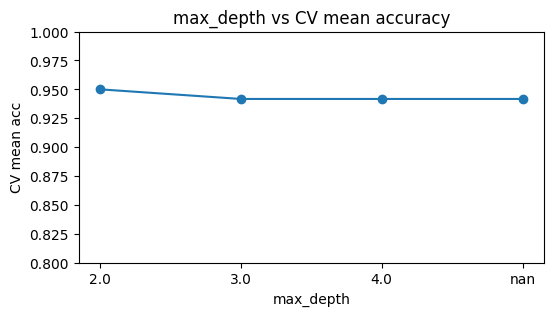

In [16]:
# 깊이 vs 성능 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
x = [str(d) for d in df_depth["max_depth"]]
plt.plot(x, df_depth["cv_mean_acc"], marker="o")
plt.ylim(0.8, 1)
plt.title("max_depth vs CV mean accuracy")
plt.xlabel("max_depth")
plt.ylabel("CV mean acc")
plt.show()

## 하이퍼파라미터 튜닝
하이퍼파라미터의 최적 값을 찾기 위한 과정이다.\

- 대표적인 하이퍼파라미터 튜닝
    - 그리드 서치(grid search)
    - 랜덤 서치(random search)
    - 베이지안 최적화(bayesian optimization) 


### GridSearchCV 사용하기
- 여러 파라미터 후보(예: max_depth, min_samples_split)를 지정한다.
- GridSearchCV는 내부적으로 교차검증(cv)을 수행해 각 조합의 평균 점수를 계산한다
- 가장 좋은 조합(best_params_)과 그때의 교차검증 성적(best_score_)을 알려준다

코드설명
```
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=18),  # estimator: 튜닝할 모델(기본 모델 객체)
    param_grid,                               # param_grid: 시험할 하이퍼파라미터 후보(조합 목록)
    cv=5,                                     # cv: 교차검증 폴드 수(5번 나눠 평균 성능 계산)
    scoring="accuracy",                       # scoring: 평가 기준(여기선 정확도)
    return_train_score=True                   # return_train_score: 훈련 점수도 저장(과적합 점검용)
)

grid.fit(X_train, y_train)                    # fit: 후보 조합들을 CV로 전부 학습/평가해서 최적 조합을 찾음

```

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 후보
param_grid = {
    "max_depth": [2, 3, 4, None],
}

# GridSearchCV: 4개 후보 × 5-Fold = 총 20번 학습
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=18
),
    param_grid,
    cv=5,
    scoring="accuracy",
    return_train_score=True   # 훈련 점수도 확인 (과적합 점검용)
)
grid.fit(X_train, y_train)

print(f"최적 파라미터: {grid.best_params_}")
print(f"최적 교차검증 정확도: {grid.best_score_:.3f}")

In [ ]:
# 모든 후보의 결과를 표로 정리
cv_df = pd.DataFrame(grid.cv_results_)[
    ["param_max_depth", "mean_train_score", "mean_test_score", "std_test_score", "rank_test_score"]
].rename(columns={
    "param_max_depth": "max_depth",
    "mean_train_score": "훈련 정확도",
    "mean_test_score": "검증 정확도",
    "std_test_score": "표준편차",
    "rank_test_score": "순위",
}).sort_values("순위")

cv_df
print()
print("→ 훈련 정확도와 검증 정확도의 차이가 크면 과적합 의심!")

### 기억할 요소
하이퍼파라미터 튜닝은 '자동 설계자'가 아니라 '자동 실험기'이다.\
| GridSearchCV가 하지 않는 것 | GridSearchCV가 하는 것 |
|:---:|:---:|
| 수학적 원리 이해 | 내가 후보로 준 값들끼리만 비교 |
| 최적 값 자동 탐색 | 교차검증으로 공정하게 평가 |

즉, 설계를 잘못하면, 후보 범위를 엉망으로 잡으면 결과도 엉망이 된다.

> 사람의 설계가 먼저, GridSearch는 그 다음.

---

## 최종 홀드아웃 평가
교차검증으로 좋은 조합을 찾았더라도, 마지막엔 처음 보는 시험지(test set)로 성능을 한 번 더 확인해야 한다.\
이 단계가 있어야 실제 배포 상황에서도 잘 동작할 가능성이 높다고 말할 수 있다.

```
best_estimator_: GridSearchCV가 찾은 최적 조합 모델(보통 refit=True일 때 재학습된 모델)
predict: 한 번도 보지 않은 test 입력에 대한 예측 라벨 생성
accuracy_score: test 정답(y_test)과 예측(pred_final)을 비교해 정확도 계산

# best_params_: 최적 하이퍼파라미터 조합
# best_score_: 훈련 데이터 내부 CV의 평균 검증 점수
```

In [ ]:
# 최종 평가: GridSearchCV가 찾은 최적 모델로 홀드아웃 테스트
best_model = grid.best_estimator_
pred_final = best_model.predict(X_test)
final_acc = accuracy_score(y_test, pred_final)

print(f"최적 모델: DecisionTree(max_depth={grid.best_params_['max_depth']})")
print(f"교차검증 정확도:       {grid.best_score_:.3f}")
print(f"홀드아웃 테스트 정확도: {final_acc:.3f}")
print()
print("→ 두 점수가 비슷하면 모델이 안정적!")

최적 모델: DecisionTree(max_depth=2)
교차검증 정확도:       0.950
홀드아웃 테스트 정확도: 0.900

→ 두 점수가 비슷하면 모델이 안정적!


> **전체 흐름 정리:**
> 1. `train_test_split`으로 홀드아웃 테스트셋을 떼어둠
> 2. 훈련 데이터에서 `cross_val_score`로 모델 비교
> 3. `GridSearchCV`로 최적 하이퍼파라미터 탐색
> 4. 최종 모델을 **한 번도 보지 않은 테스트셋**으로 평가
>
> 테스트셋은 **마지막에 딱 한 번만** 사용합니다!